# What makes a city overpopulated?

As an Albanian, one of the complaints I hear people make most often is that the capital, Tirana is overcrowded: it has a huge traffic problem, pollution issues and lack of green spaces. Today, we are going to look at this issue from a data science viewpoint. Is Tirana truly overpopulated?

## Topic: How is the population spread in "njesi"?

While Tirana as a whole might have a very high population density, this might not necessarily be true for all of its administrative areas. The city of Tirana has 11 "njesi" or administrative areas, and each of them have different population counts. Using data from the mayor's office website and the geopandas package, we can plot the map below.

In [2]:
import sys
!conda install --yes --prefix {sys.prefix} geopandas

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
states = gpd.read_file('njesia_2.geojson')
states.head()

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


,Id,Nj_Admin,_umap_options,id,emertimi,nr_njesie,njesia_adm,name,description,geometry
0,2.0,Nj. Admin 2,{'color': 'Brown'},NaN,None,None,None,None,None,POINT (19.83035 41.32590)
1,NaN,None,{'outlink': 'https://opendata.tirana.al/?q=bal...,11.0,Njesia Administrative BALDUSHK,19,NJA BALDUSHK,Baldushku,None,"POLYGON Z ((19.78872 41.25826 0.00000, 19.7893..."
2,NaN,None,{'outlink': 'https://opendata.tirana.al/?q=bër...,12.0,Njesia Administrative BERZHITE,20,NJA BERZHITE,Bërzhita,None,"POLYGON Z ((20.01048 41.29406 0.00000, 20.0104..."
3,NaN,None,{'outlink': 'https://opendata.tirana.al/?q=daj...,21.0,Njesia Administrative DAJT,12,NJA DAJT,Dajti,None,"POLYGON Z ((19.89645 41.38585 0.00000, 19.8984..."
4,NaN,None,{'outlink': 'https://opendata.tirana.al/?q=far...,19.0,Njesia Administrative FARKE,13,NJA FARKE,Farka,None,"POLYGON Z ((19.87214 41.33105 0.00000, 19.8723..."


Text(0.5, 179.4324829411872, 'Longitude')

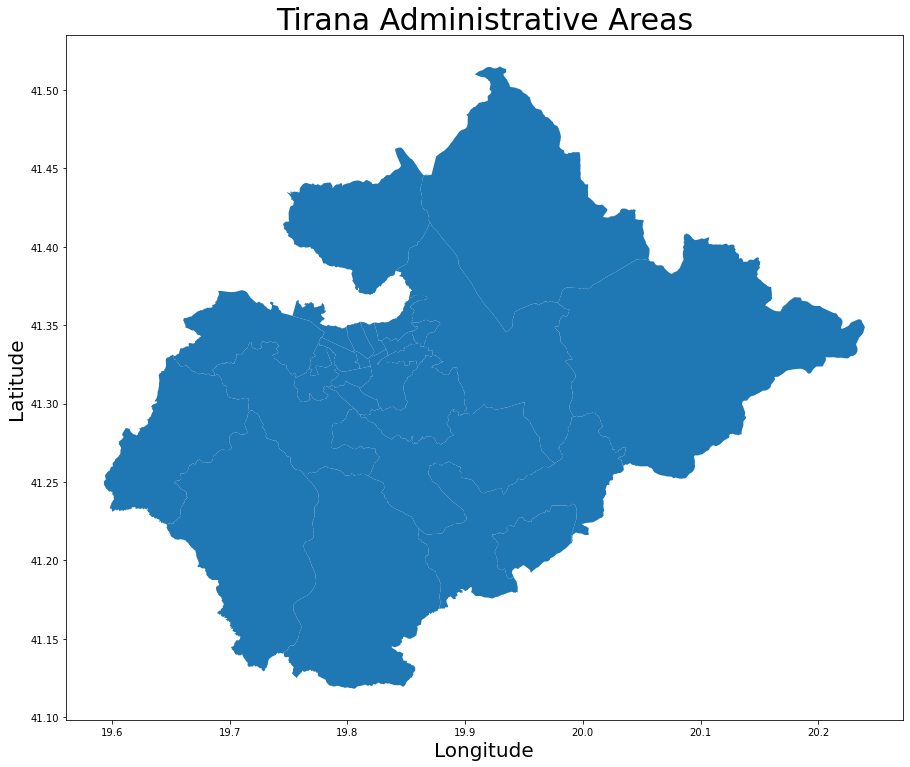

In [2]:
fig, ax = plt.subplots(figsize = (15,15))
states.plot(ax=ax)
ax.set_title('Tirana Administrative Areas',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

In [3]:
import pandas as pd
pa = pd.read_csv("pop2020 (1).csv")
population_list_of_11 = pa.Popullsia_2020.tolist()
pa.head()

,Longitude,Latitude,"NJESIA_ADM,C,254",Popullsia_2020,Femra_2020,%_Femrave_2020
0,19.8302,41.3259,Nja.1,51816,26360,50.90%
1,19.8303,41.3259,Nja.2,83371,42372,50.80%
2,19.8296,41.3390,Nja.3,45391,23228,51.20%
3,19.8296,41.3390,Nja.4,65511,33315,50.90%
4,19.8156,41.3198,Nja.5,87312,44866,51.40%


In [4]:
#calculating densities
list_surfaces = [3.06, 9.58, 2.01, 4.92, 2.87, 5.48, 3.06, 1.95, 2.82, 0.77, 5.21]

In [5]:
df_pop_ad = pd.DataFrame(data = {"Population": population_list_of_11[:11] , "Area": list_surfaces})

In [6]:
p = states.geometry.tolist()
df_pop_ad["Density"] = df_pop_ad.Population/df_pop_ad.Area
df_pop_ad["geometry"] = [p[11],p[14],p[15], p[16], p[17], p[18], p[19], p[20], p[21], p[12], p[13]]
df_pop_ad.head()

,Population,Area,Density,geometry
0,51816,3.06,16933.333333,"POLYGON Z ((19.86189 41.338498 0, 19.861835 41..."
1,83371,9.58,8702.609603,"POLYGON Z ((19.833797 41.330171 0, 19.831824 4..."
2,45391,2.01,22582.587065,"POLYGON Z ((19.856207 41.340581 0, 19.856403 4..."
3,65511,4.92,13315.243902,"POLYGON Z ((19.859213 41.368606 0, 19.863136 4..."
4,87312,2.87,30422.299652,"POLYGON Z ((19.820595 41.320587 0, 19.820691 4..."


<AxesSubplot:>

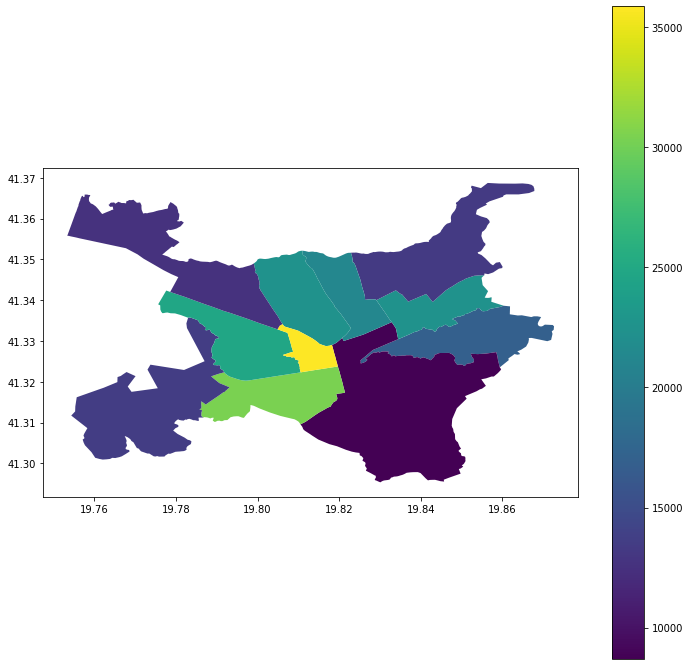

In [7]:
from geopandas import GeoDataFrame
fig, ax = plt.subplots(figsize = (12,12))
df_pop_ad = GeoDataFrame(df_pop_ad)
df_pop_ad.plot(column="Density",legend=True, ax = ax)

The map above shows Tirana's 11 administrative areas, and the corresponding population densities for each of them. Notably, the distribution of densities isn't at all similar across the areas. One area in particular has comparably high density (colored in yellow). Let's take a look at which one it is:

In [8]:
df_pop_ad_only_1 = df_pop_ad[df_pop_ad.Density >= 35000]
df_pop_ad_only_1.head()

,Population,Area,Density,geometry
9,27608,0.77,35854.545455,"POLYGON Z ((19.81824 41.32906 0.00000, 19.8185..."


From the output, it seems like the 10th administrative area has the highest density of all areas. This raises the question whether this area is also more polluted, or experiences higher amount of traffic. Additionally, because it is more populated, can it in fact have more resources allocated to it, such as schools or green spaces?

Some other areas, on the other hand, seem to have slightly lower population density. To look at them, let's first calculate the mean density, and then look at which areas have a density lower than that.

In [9]:
import numpy as np
mean_dens = np.mean(df_pop_ad.Density)
mean_dens

20229.54889607044

In [10]:
df_pop_ad_lower = df_pop_ad[df_pop_ad.Density <= mean_dens]
df_pop_ad_lower.head()

,Population,Area,Density,geometry
0,51816,3.06,16933.333333,"POLYGON Z ((19.86189 41.33850 0.00000, 19.8618..."
1,83371,9.58,8702.609603,"POLYGON Z ((19.83380 41.33017 0.00000, 19.8318..."
3,65511,4.92,13315.243902,"POLYGON Z ((19.85921 41.36861 0.00000, 19.8631..."
5,74135,5.48,13528.284672,"POLYGON Z ((19.75568 41.31622 0.00000, 19.7615..."
10,65279,5.21,12529.558541,"POLYGON Z ((19.75880 41.36537 0.00000, 19.7587..."


So we see that 5 of the areas have a lower than average density, with entry 1, or Area 2 having the lowest one of all. In the map, this corresponds to the dark purple zone. Similar to the questions we raised about Area 9, it will be interesting to see whether the population density corresponds to the amount of investments or resource allocation.

Additonally, to get a better sense of how Tirana compares to other countries' capitals we also should look at the data from other cities. Below, I have imported a csv of population counts from the Ourworldindata.com: 

In [11]:
un_pop = pd.read_csv("population-density-by-city.csv")
un_pop = un_pop.rename({'Population density by city': 'Density'}, axis=1)
un_pop.head()

,Entity,Code,Year,Density
0,Abidjan,NaN,2014,14700
1,Accra,NaN,2014,4300
2,Ahmedabad,NaN,2014,19800
3,Alexandria,NaN,2014,15600
4,Ankara,NaN,2014,6500


In [12]:
mean_dens_world = np.mean(un_pop.Density)
mean_dens_world

7465.2

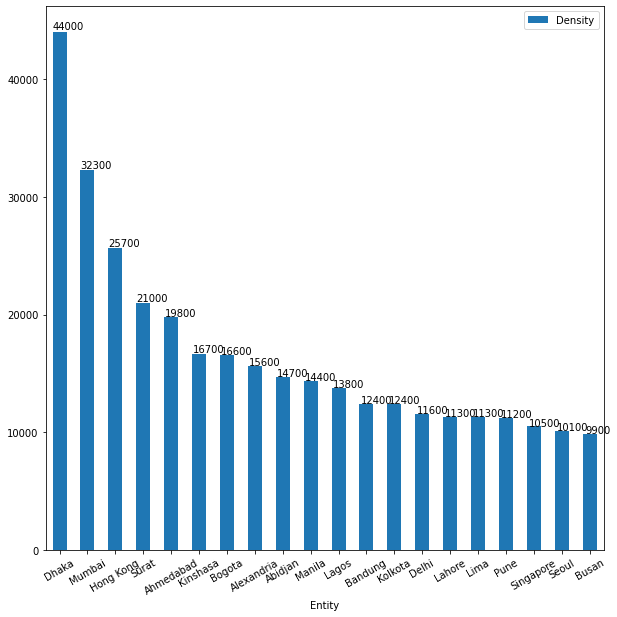

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
sorted_un = un_pop.sort_values(by=['Density'], ascending = False)
sorted_un.head(20).plot.bar(x='Entity', y='Density', rot=0, ax=ax)
plt.xticks(rotation=30, horizontalalignment="center")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Urban Tirana

## Green Areas

https://opendata.tirana.al/?q=dataset/parqet-dhe-zonat-rekreative-n%C3%AB-tiran%C3%AB-2020/resource/parqet-dhe-zonat-rekreative-n%C3%AB-tiran%C3%AB#{view-graph:{graphOptions:{hooks:{processOffset:{},bindEvents:{}}}},graphOptions:{hooks:{processOffset:{},bindEvents:{}}},view-grid:{columnsWidth:[{column:!Treguesi,width:372}]}}

<b>Question: some calculation of green space percentage. Are there administrative differences? </b>


In [14]:
green_2 = gpd.read_file('map (5).geojson')

<AxesSubplot:>

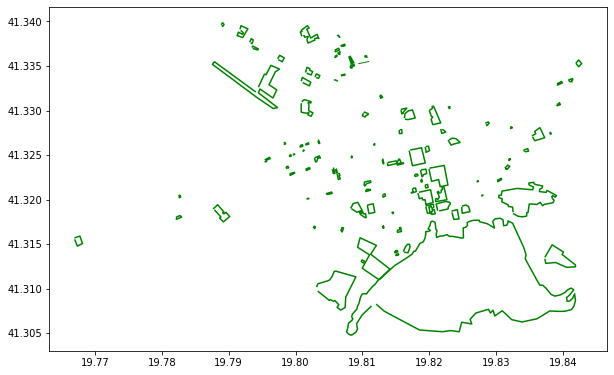

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
green_2.plot(ax=ax, color="green")

Now that we have a model of green spaces in urban Tirana, let's calculate their respective areas using the area package:

In [16]:
import shapely
type(green_2.geometry.iloc[1])

shapely.geometry.linestring.LineString

In [17]:
coords = []
import numpy as np
for i in range(len(green_2.index)):
    if type(green_2.geometry.iloc[i]) == shapely.geometry.linestring.LineString:
        l = list(green_2.geometry.iloc[i].coords)
        coords.append(np.radians(l))
        

In [18]:
from pyproj import Proj
pa = Proj("+proj=aea +lat_1=37.0 +lat_2=41.0 +lat_0=39.0 +lon_0=-106.55")
area_greens = []
for i in range(len(coords)):
    cop = {"type": "Polygon", "coordinates": [coords[i]]}
    from shapely.geometry import shape
    area_greens.append(shape(cop).area*6370**2)
    

In [19]:
max(area_greens)

2.9083760646900587

In [20]:
sum(area_greens)

4.078872815753409

Interestingly, about 4 square kilometers of Tirana seem to be green spaces, i.e. parks, recreational areas, sports fields. That amounts to 4/41.8 (or about 10 percent) of the total urban area. How does it compare to other capitals? Below, I have imported some data about world cities' green ara percentage. . Tirana actually scores higher than cities like Paris (with 9.5% green areas) but significantly lower when compared to other European capitals like London or Vienna.

In [21]:
green_by_city = pd.read_csv("%_of_public_green_space_(parks_and_gardens)_17062020.csv")
green_by_city.sort_values(by=["Figure"], ascending = False).head(10)

,City,Figure,Per capita,Date,Source,Notes
25,Paris,9.50%,NaN,2013,IAU Ile-de-France,NaN
5,Buenos Aires,9.40%,NaN,2018,Estadísticas y Censos,NaN
35,Tokyo,7.50%,NaN,2015,Bureau of Urban Development,Survey of City Planning Park and Green Space i...
24,Oslo,68.00%,NaN,2018,"Bymiljøetaten, Oslo kommune",NaN
31,Singapore,47.00%,NaN,2011,National Parks Board,NaN
33,Sydney,46.00%,NaN,2010,New South Wales Department of Planning,NaN
37,Vienna,45.50%,NaN,2014,Vienna Annual Statistics 2014,NaN
7,Chengdu,42.30%,NaN,2017,Statistics Bureau of Chengdu,NaN
39,Zürich,41.00%,NaN,2018,Grün Stadt Zürich,NaN
30,Shenzhen,40.90%,NaN,2016,Shenzhen Statistical Yearbook,NaN


In [22]:
s = list(green_by_city.Figure)
new_s = []
for i in range(len(s)):
    i = str(i)
    i = float(i.strip("%"))
    new_s.append(i)
green_by_city["Fixed"] = new_s  
green_by_city.head()

,City,Figure,Per capita,Date,Source,Notes,Fixed
0,Amsterdam,13.00%,NaN,2018,Statistics Netherlands/TNO,NaN,0.0
1,Austin,11.00%,NaN,2018,The Trust for Public land ParkScore 2018,NaN,1.0
2,Barcelona,11.00%,NaN,2019,Department of Statistics. Barcelona City Council,NaN,2.0
3,Bogotá,4.90%,NaN,2017,Departamento Administrativo de la Defensoría d...,NaN,3.0
4,Brussels,18.80%,NaN,2015,IBGE,NaN,4.0


<b>Question: is there enough green area per person in Tirana? What about in the administrative area level? How has that changed?</b>

To answer this part, there needs to be some kind of normalized metric: how about population density divided by percentage of green space? Let's see what that outputs. First, the function below calculates this specific metric for the cities which appear in the green areas dataset, then it outputs a visualization.

In [50]:
un_pop_cities_list = un_pop.Entity
green_cities_list = list(green_by_city.City)
cities_list = []
metric = []
for city in un_pop_cities_list:
    if city in green_cities_list:
        cities_list.append(city)
        metric.append(int((un_pop[un_pop.Entity == city].Density))/(int(green_by_city[green_by_city.City == city].Fixed)))

In [51]:
tirana_metric = mean_dens/10
metric.append(tirana_metric)
fixed = []
for m in metric:
    m = 1/m
    fixed.append(m)

cities_list.append("Tirana")


In [53]:
d = {"Cities": cities_list , "Metric": fixed}
new_df = pd.DataFrame(data = d)
new_df.sort_values(by=["Metric"]).head()

,Cities,Metric
0,Barcelona,0.000465
4,Hong Kong,0.000467
25,Tirana,0.000494
2,Chengdu,0.000864
1,Buenos Aires,0.000943


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Barcelona'),
  Text(1, 0, 'Hong Kong'),
  Text(2, 0, 'Tirana'),
  Text(3, 0, 'Chengdu'),
  Text(4, 0, 'Buenos Aires'),
  Text(5, 0, 'Istanbul'),
  Text(6, 0, 'Guangzhou'),
  Text(7, 0, 'London'),
  Text(8, 0, 'Seoul'),
  Text(9, 0, 'Singapore'),
  Text(10, 0, 'Shenzhen'),
  Text(11, 0, 'Nanjing'),
  Text(12, 0, 'Johannesburg'),
  Text(13, 0, 'Shanghai'),
  Text(14, 0, 'Taipei'),
  Text(15, 0, 'Moscow'),
  Text(16, 0, 'Paris'),
  Text(17, 0, 'Milan'),
  Text(18, 0, 'Los Angeles'),
  Text(19, 0, 'Rome')])

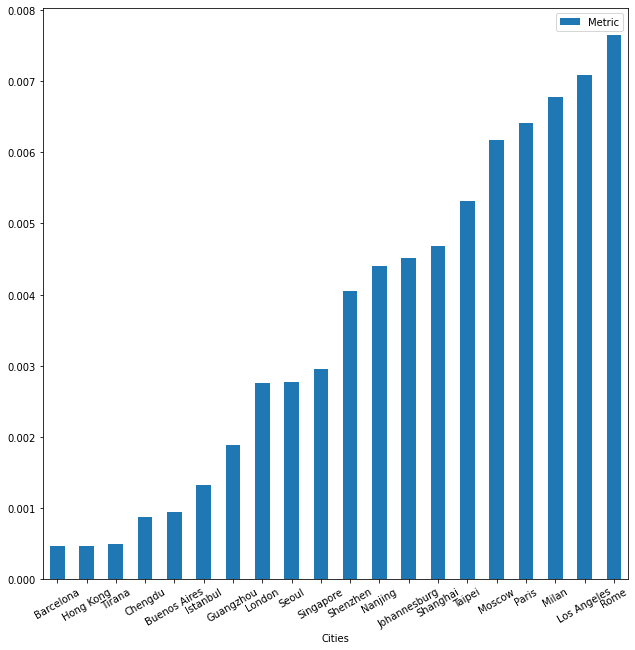

In [55]:
fig, ax = plt.subplots(figsize = (10.5,10.5))
sorted_un_f = new_df.sort_values(by=['Metric'], ascending = True)
sorted_un_f.head(20).plot.bar(x='Cities', y='Metric', rot=0, ax=ax)
plt.xticks(rotation=30, horizontalalignment="center")

<b>But how are these green spaces spread out?</b> Before delving into the data, my intution tells me that area 2 will have the highest "spread" since it also contains the Artifical Lake. I also expect area 10 to have a pretty high concentration of green space just by annecdotal evidence and what I have seen across the city.

In [33]:
geometries_only = list(df_pop_ad.geometry)
geo_only = list(green_2.geometry)
geo_only += geometries_only
df_geoms = pd.DataFrame(data = {"geometry": geo_only})
type(df_geoms.geometry.iloc[1])

shapely.geometry.linestring.LineString

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

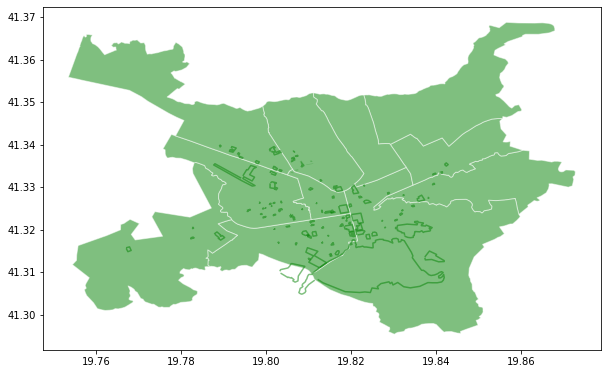

In [34]:
df_geoms = GeoDataFrame(df_geoms)
poly_gdf = df_geoms[df_geoms.geometry != shapely.geometry.linestring.LineString]
line_gdf = df_geoms[df_geoms.geometry == shapely.geometry.linestring.LineString]
fig, ax = plt.subplots(figsize = (10,10))
poly_gdf.plot(ax=ax, alpha=0.5, color = "green", edgecolor="white")
line_gdf.plot(ax=ax, color='blue')

As a preliminary step to deciding whether there are differences between areas' green spaces, let's normalize a metric like for example total green space per each administrative area. To do so in code, we must first assign each green space in the database to 1 administrative area and then run the calculations for the metric we defined. For this, we can use geopandas to simplify the task.

<b> How much space is there per person?</b> This question is not necessarily hard to answer, and we can just divide the population count for Tirana with the amount of green space there is. This value is calculated below:

In [72]:
total_pop = 900000
total_green = 4.078872815753409
green_per_person = total_green/total_pop
print("Each person has about" ,green_per_person, "m2")

Each person has about 4.532080906392677e-06 m2


In [62]:
list_areas_g = []
g_contained = []
for p in green_2.iterrows():
    for d in states.iterrows():
        if p[1][0].within(d[1][0]):
            list_areas_g.append(d[1][5])
            g_contained.append(p[1][0])

AttributeError: 'float' object has no attribute '_geom'

In [57]:
green_2

,geometry
0,"LINESTRING (19.81135 41.30808, 19.80994 41.307..."
1,"LINESTRING (19.80314 41.31018, 19.80333 41.310..."
2,"LINESTRING (19.81241 41.31105, 19.80996 41.312..."
3,"LINESTRING (19.80824 41.31903, 19.80861 41.319..."
4,"LINESTRING (19.81072 41.31940, 19.81160 41.319..."
...,...
103,"LINESTRING (19.80815 41.33506, 19.80871 41.335..."
104,"POLYGON ((19.80673 41.33406, 19.80682 41.33382..."
105,"POLYGON ((19.80562 41.33343, 19.80631 41.33323..."
106,"POLYGON ((19.80936 41.33531, 19.80939 41.33520..."


# Traffic

<b>Questions: </b>
1. Are areas equally reachable by public transport?
2. Do areas with higher population also have more transport infrastructure?
3. How does traffic compare with other metropolitan cities?

For this part, I am going to use data from opendatatirana to map all of the bus itineraries in Tirana. Let's add it in the form of a graph using the networkx package so that we can do various graph related operations on it. First of all, are there enough bus stations? My first instinct tells me no, in my experience, the buses are often overcrowded at twice their capacity. But is that really the case?

### Bus Stations Analysis

In [73]:
route_1 = gpd.read_file("https://opendata.tirana.al/sites/default/files/linjat_e_autobus_ve_publik__dhe_stacionet.geojson")

<AxesSubplot:>

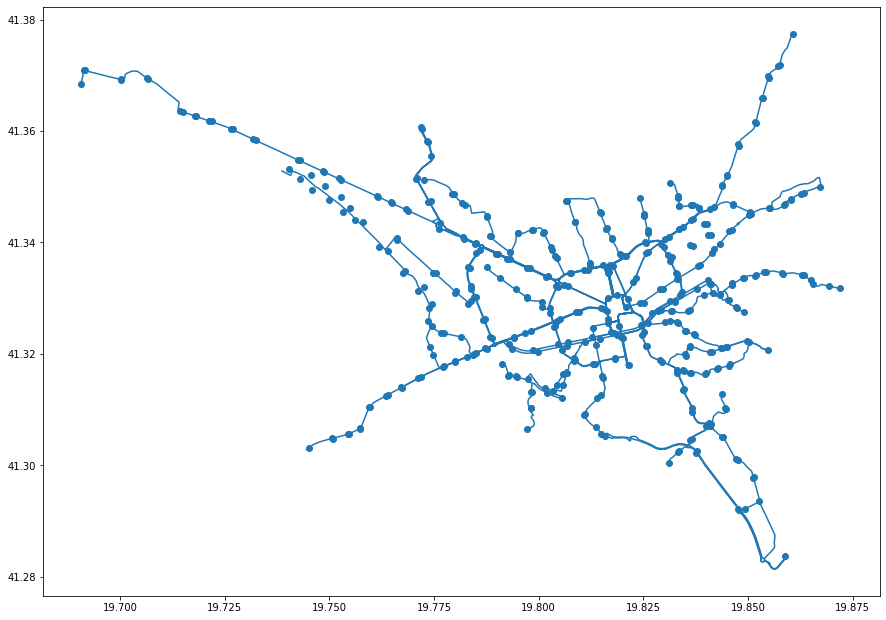

In [74]:
fig, ax = plt.subplots(figsize = (15,15))
route_1.plot(ax = ax)

In [75]:
#convert all these to a graph for more easy manipulation
route_1.head()

,Id,RRUGA,name,description,stroke,stroke-opacity,fill-opacity,EMERTIMI,EMERTIMI_L,linja,geometry
0,0,Siri Kodra,None,None,None,NaN,NaN,None,None,None,POINT (19.80661 41.34748)
1,0,Siri Kodra,None,None,None,NaN,NaN,None,None,None,POINT (19.81477 41.34531)
2,0,Siri Kodra,None,None,None,NaN,NaN,None,None,None,POINT (19.81458 41.34543)
3,0,Siri Kodra,None,None,None,NaN,NaN,None,None,None,POINT (19.81742 41.34077)
4,0,Siri Kodra,None,None,None,NaN,NaN,None,None,None,POINT (19.81740 41.34061)


In [77]:
grouped_stations = route_1.RRUGA.value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Autostrada Tiranë-Durrës'),
  Text(1, 0, 'Elbasanit'),
  Text(2, 0, 'Dibrës'),
  Text(3, 0, 'Pjeter Budi'),
  Text(4, 0, 'Myslym Keta'),
  Text(5, 0, 'Ali Demi'),
  Text(6, 0, 'Teodor Keko'),
  Text(7, 0, 'Ali Shefqeti'),
  Text(8, 0, '3 Deshmoret'),
  Text(9, 0, 'Konferenca e Pezes'),
  Text(10, 0, 'Kavajes'),
  Text(11, 0, 'Don Bosko'),
  Text(12, 0, 'Kastriotët'),
  Text(13, 0, 'Dritan Hoxha'),
  Text(14, 0, 'Siri Kodra'),
  Text(15, 0, 'Muhamet Deliu'),
  Text(16, 0, 'Fuat Toptani'),
  Text(17, 0, 'LLazi Miho'),
  Text(18, 0, 'Bardhyl'),
  Text(19, 0, 'Rexhep Pinari'),
  Text(20, 0, '7 Nentori'),
  Text(21, 0, 'Sulejman Delvina'),
  Text(22, 0, 'Xhanfize Keko'),
  Text(23, 0, 'Pasho Hysa'),
  Text(24, 0, 'Shefqet Ndroqi'),
  Text(25, 0, 'Blv. “Bajram Curri”'),
  Text(26, 0, 'Ferit Xhajko'),
  Text(27, 0, 'Kongresi Manastirit'),
  Te

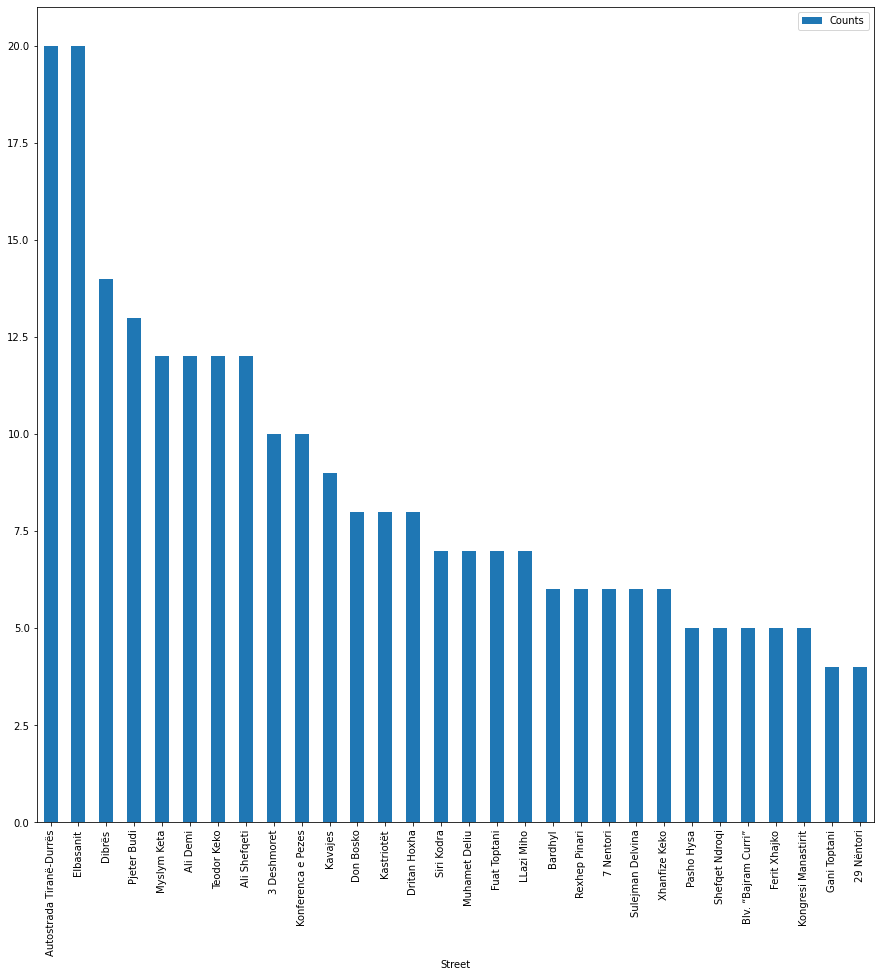

In [78]:
v = grouped_stations.values
k = grouped_stations.index.values
plotted = pd.DataFrame(data = {"Street": k , "Counts": v})
fig, ax = plt.subplots(figsize = (15,15))
plotted.head(30).plot.bar(x='Street', y='Counts', rot=0, ax=ax)
plt.xticks(rotation=90, horizontalalignment="center")

The "Tirane-Durres" highwaw has the most bus stops, followed by Elbasani and Dibra Streets. I am interested in determining if these stops are distributed evenly in terms of the population. That is, is the number of bus stops proportional to the people living in an administrative area? To do so, we must first figure out how to classify these streets or bus stops into their respective areas. Let's do so via GeoPandas' "within function".

In [79]:
list_areas = []
route_1_contained = []
for p in route_1.iterrows():
    for d in states.iterrows():
        if p[1][10].within(d[1][9]):
            list_areas.append(d[1][5])
            route_1_contained.append(p[1][10])

In [80]:
print(len(list_areas),len(route_1_contained))

574 574


<AxesSubplot:>

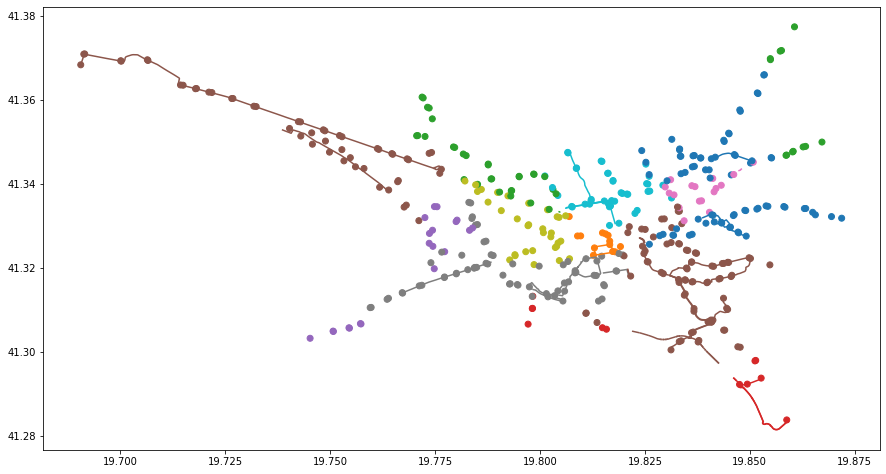

In [81]:
data_frame = pd.DataFrame(data = {"Stops":list_areas , "geometry": route_1_contained})
data_frame = GeoDataFrame(data_frame)
fig, ax = plt.subplots(figsize = (15,15))
data_frame.plot(column="Stops", ax = ax)

Now, we have a colored plot of bus stops, divided by the areas they are found in. We can start answering the question about whether there are enough stops for people in each area.

<AxesSubplot:xlabel='Pop_area', ylabel='Counts'>

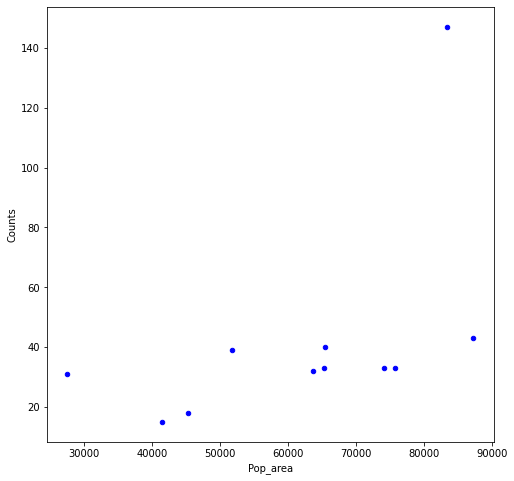

In [82]:
g = data_frame.groupby(['Stops']).size()
v = g.index.values
k = g.values
new_k = [39, 147, 18, 40, 43, 33, 33, 15, 32, 31, 33]
da = pd.DataFrame(data = {"Pop_area": population_list_of_11[:11], "Counts": new_k})
fig, ax = plt.subplots(figsize = (8,8))
da.plot(kind='scatter',x='Pop_area',y='Counts',color='blue', ax = ax)

Interestingly, there does not seem to be a strong linear relationship between population count and number of bus stops. In fact, with increasing population count, the number of stops seems to stay constant (around 40). There is one outlier with more than 140 stops, despite not having the highest population count, and that specific area is area 2.

Let's get a better idea about some normalized count of bus stops and for that we can use density/bus counts. For the densities, we have computed them before so we can easily calculate the necessary metric here as well:

<AxesSubplot:xlabel='Name'>

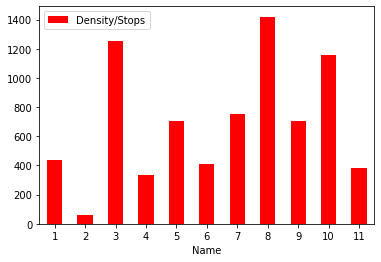

In [83]:
d = list(df_pop_ad.Density)
density_stops = [a / b for a, b in zip(d, new_k)]
da["Density/Stops"] = density_stops
da["Name"] = np.arange(1,12)
da.sort_values(by=['Density/Stops'], ascending = False).plot.bar(x = 'Name', y='Density/Stops', rot=0, color = "red")

Now, the data tells a different story. Firstly, to continue from above, area 2 actually has a pretty low normalized bus score, while other areas like the 8th ,3rd and 10th have very bus scores according to our metric. 

## Pollution

https://opendata.tirana.al/?q=dataset/ndotje-nga-subjektet-2020/resource/ndotje-nga-subjektet-2020#{view-graph:{graphOptions:{hooks:{processOffset:{},bindEvents:{}}}},graphOptions:{hooks:{processOffset:{},bindEvents:{}}},view-grid:{columnsWidth:[{column:!Subjekti,width:396}]}}

Acoustic pollution levels:  https://opendata.tirana.al/?q=dataset/niveli-i-ndotjes-akustike-2019/resource/niveli-i-ndotjes-akustike-2019#{view-graph:{graphOptions:{hooks:{processOffset:{},bindEvents:{}}}},graphOptions:{hooks:{processOffset:{},bindEvents:{}}},view-grid:{columnsWidth:[{column:!Stacionet++e++Monitorimit,width:305},{column:!Laeq++Diten++19,width:226},{column:!Laeq++Naten++19,width:262}]}}

Air pollution: https://opendata.tirana.al/?q=dataset/niveli-i-ndotjes-s%C3%AB-ajrit-n%C3%AB-tiran%C3%AB

<b>Questions: </b>
1. How do pollution levels change over the years?
2. Does pollution depend on the number of people living in an area?

For this part, let's make a  visualization on how pollution levels have changed.

In [35]:
data_2015 = pd.read_csv("Të dhëna mbi nivelin e ndotjes në Tiranë, Viti 2015.csv")
data_2016 = pd.read_csv("Të dhëna mbi nivelin e ndotjes në Tiranë, Viti 2016.csv")
data_2014 = pd.read_csv("Të dhëna mbi nivelin e ndotjes në Tiranë, Viti 2014.csv")
#data_2013 = pd.read_csv("Të dhëna mbi nivelin e ndotjes në Tiranë, Viti 2013.csv")
data_2012 = pd.read_csv("Të dhëna mbi nivelin e ndotjes në Tiranë, Viti 2012.csv")
data_2017 = pd.read_csv("Të dhëna mbi nivelin e ndotjes në Tiranë, Viti 2017.csv")
#data_2019 = pd.read_csv("Të dhëna mbi nivelin e ndotjes në Tiranë, Viti 2019.csv")

In [36]:
so2 = []
no2 = []
o3 = []
pm10 = []
co = []

def get_air(year_database, t_compound, compound_list):
    year_database_compound = year_database[year_database.Treguesi == t_compound]
    compound_list.append(year_database_compound.iloc[:, 2])
    
get_air(data_2012, "SO2", so2)
#get_air(data_2013, "SO2", so2)
get_air(data_2014, "SO2", so2)
get_air(data_2015, "SO2", so2)
get_air(data_2016, "SO2", so2)
get_air(data_2017, "SO2", so2)

In [37]:
get_air(data_2012, "NO2", no2)
#get_air(data_2013, "NO2", no2)
get_air(data_2014, "NO2", no2)
get_air(data_2015, "NO2", no2)
get_air(data_2016, "NO2", no2)
get_air(data_2017, "NO2", no2)

In [38]:
get_air(data_2012, "O3", o3)
#get_air(data_2013,  "O3", o3)
get_air(data_2014,  "O3", o3)
get_air(data_2015,  "O3", o3)
get_air(data_2016, "O3", o3)
get_air(data_2017, "O3", o3)

In [39]:
get_air(data_2012, "PM10", pm10)
#get_air(data_2013, "PM10", pm10)
get_air(data_2014, "PM10", pm10)
get_air(data_2015, "PM10", pm10)
get_air(data_2016, "PM10", pm10)
get_air(data_2017, "PM10", pm10)

In [40]:
get_air(data_2012, "CO", co)
#get_air(data_2013, "CO", co)
get_air(data_2014, "CO", co)
get_air(data_2015, "CO", co)
get_air(data_2016, "CO", co)
get_air(data_2017, "CO", co)

In [41]:
for i in range(len(no2)):
    no2[i] = float(no2[i])
    
for i in range(len(so2)):
    so2[i] = float(so2[i])

for i in range(len(co)):
    co[i] = float(co[i])
    
for i in range(len(o3)):
    o3[i] = float(o3[i])
    
for i in range(len(pm10)):
    pm10[i] = float(pm10[i])    

In [42]:
pd_no2 = pd.DataFrame(data = {"Year":[2012, 2014, 2015, 2016, 2017], "Val_NO2": no2})
pd_o3 = pd.DataFrame(data = {"Year": [2012, 2014, 2015, 2016, 2017], "Val_O3": o3})
pd_so2 = pd.DataFrame(data = {"Year":[2012, 2014, 2015, 2016, 2017], "Val_SO2": so2})
pd_co = pd.DataFrame(data = {"Year":[2012, 2014, 2015, 2016, 2017], "Val_CO": co})
pd_pm10 = pd.DataFrame(data = {"Year": [2012, 2014, 2015, 2016, 2017], "Val_PM10": pm10})

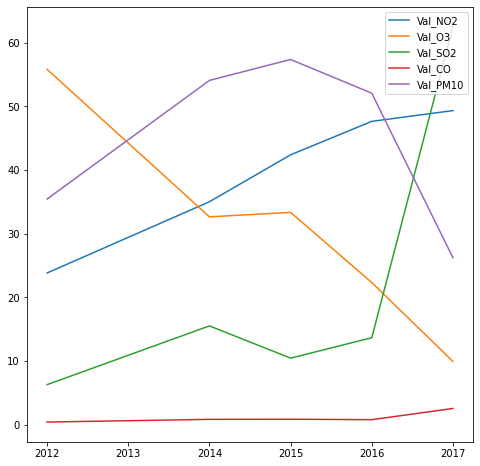

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (8,8))

ax.plot('Year', 'Val_NO2', data=pd_no2)
ax.plot('Year', 'Val_O3', data=pd_o3)
ax.plot('Year', 'Val_SO2', data=pd_so2)
ax.plot('Year', 'Val_CO', data=pd_co)
ax.plot('Year', 'Val_PM10', data=pd_pm10)
ax.legend()
plt.show()

Now that we have the pollution visualizations we can see a lowering trend in Ozone(03), but an increasing trend in NO2, SO2, and PM10. I am interested in seeing whether these abide by EU standards, and also in comparing them with other capitals'. According to EU standards, NO2 annual mean value may not exceed 40 micrograms per cubic metre (µg/m3). In 2016, we can see that these standards were exceeded. For S02, the daily mean value may not exceed 125 micrograms per cubic metre (µg/m3) more than 3 times in a year, which seems within limits in Tirana's case. For CO on the other hand, the levels should not exceed 10(µg/m3), which is pretty far from Tirana's 0 (µg/m3) levels. For PM10, by EU standards, the levels must not exceed 40 (µg/m3). Interestingly, PM10 levels rose up until 2015 and then fell.

<b>Compare to other capitals </b>

In [96]:
#importing the data
import pandas as pd
pd_capital = pd.read_csv("data.csv")
pd_capital = pd_capital[pd_capital.ParentLocation == "Europe"]
pd_capital.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,MLT,Malta,Year,2016,...,NaN,NaN,9.02,NaN,11.23,10.06 [9.02 – 11.23],NaN,NaN,EN,2018-05-15T22:00:00.000Z
5,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,DNK,Denmark,Year,2016,...,NaN,NaN,9.27,NaN,11.30,10.12 [9.27 – 11.3],NaN,NaN,EN,2018-05-15T22:00:00.000Z
9,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,LUX,Luxembourg,Year,2016,...,NaN,NaN,9.51,NaN,10.88,10.21 [9.51 – 10.88],NaN,NaN,EN,2018-05-15T22:00:00.000Z
10,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,CHE,Switzerland,Year,2016,...,NaN,NaN,9.99,NaN,10.64,10.21 [9.99 – 10.64],NaN,NaN,EN,2018-05-15T22:00:00.000Z
14,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,DNK,Denmark,Year,2016,...,NaN,NaN,9.54,NaN,11.41,10.34 [9.54 – 11.41],NaN,NaN,EN,2018-05-15T22:00:00.000Z


10.64


<AxesSubplot:xlabel='Location'>

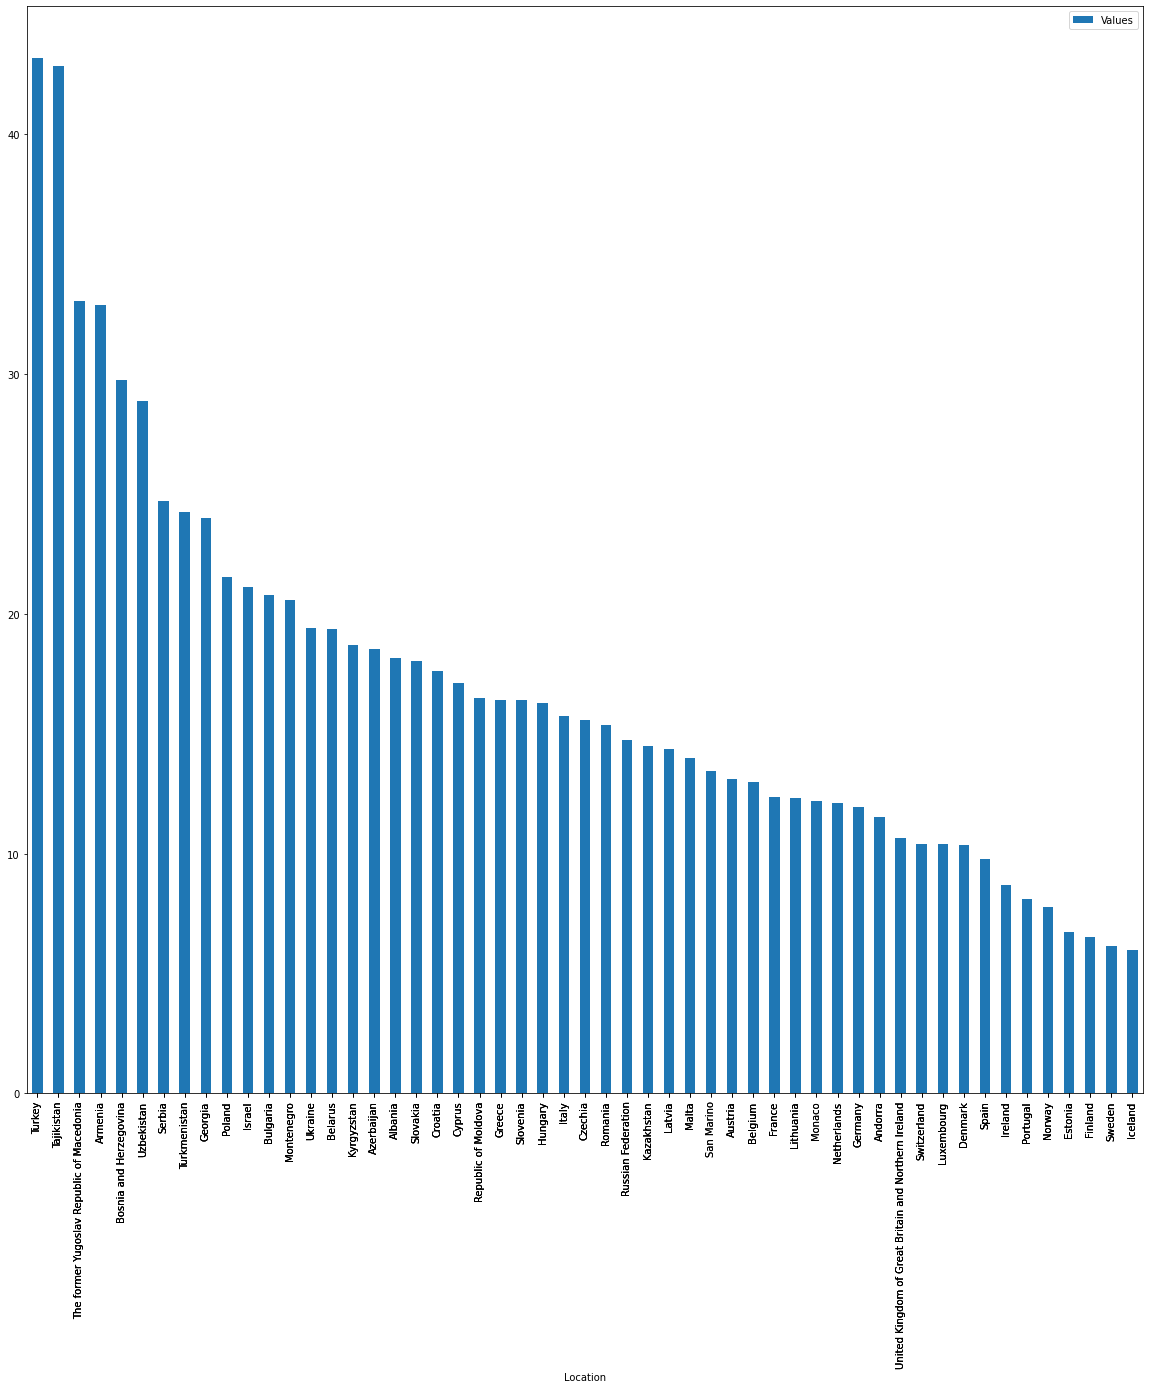

In [117]:
import re
list_vals = []
list_loc = []
vals_check = list(pd_capital.Value)
locs = list(pd_capital.Location)
for p in pd_capital.iterrows():
    r1 = re.search(r"\d{1,3}[.]\d{1,3}", p[1][29])
    if r1 != None:
        list_loc.append(p[1][7])
        list_vals.append(r1.group(0))
        
for i in range(len(list_vals)):
    list_vals[i] = float(list_vals[i])    

fig, ax = plt.subplots(figsize = (20,20))
pd.DataFrame(data = {"Location":list_loc, "Values":list_vals}).sort_values(by=['Values'], ascending = False).plot.bar(x = 'Location', y="Values", ax = ax)

Now that we have the visualization, we can compare the data against each-other. The lowest PM10 data for Tirana is about 27 micrograms per cubic meter, and that ranks high on the chart above. This indicates pretty high levels of pollution in comparison to the rest of Europe.

In [108]:
#mean value for PM10 and PM2.5 in Europe
print(np.mean(list_vals), max(list_vals), min(list_vals))

78.0 156.0 0.0


In [95]:
air_2016 = pd.read_csv("Intesiteti i zhurmave sipas zonave referuese, 2016_0.csv")
air_2017 = pd.read_csv("Intesiteti i zhurmave sipas zonave referuese, 2017.csv")
air_2019 = pd.read_csv("Vlerat mesatare të nivelit të zhurmave, viti 2019_2.csv")
air_2019.columns

Index(['Nr. Rendor', 'Stacionet e Monitorimit', 'Njesia e \nMatjes',
       'Laeq Diten 19', 'Laeq Naten 19'],
      dtype='object')

In [138]:
air_2016 = air_2016.rename(columns={'Intesiteti  2016 Gjate dites 6:00-23:00': 'Dite', 'Intesiteti  2016 Gjate nates 23:00-6:00': 'Nate'})
air_2017 = air_2017.rename(columns={'Intesiteti  2017 Gjate dites 6:00-23:00': 'Dite', 'Intesiteti  2017 Gjate nates 23:00-6:00': 'Nate'})
air_2019 = air_2019.rename(columns={'Laeq Diten 19': 'Dite', 'Laeq Naten 19': 'Nate'})

Now, let's look at acoustic pollution levels. The data below are taken from Tirana Open Data, and they show night and day time acoustic pollution in decibels, and the scatterplot shows the relation between day and night pollution levels. As you can see, there does not seem to be a correlation between the two.

<AxesSubplot:xlabel='Dite', ylabel='Nate'>

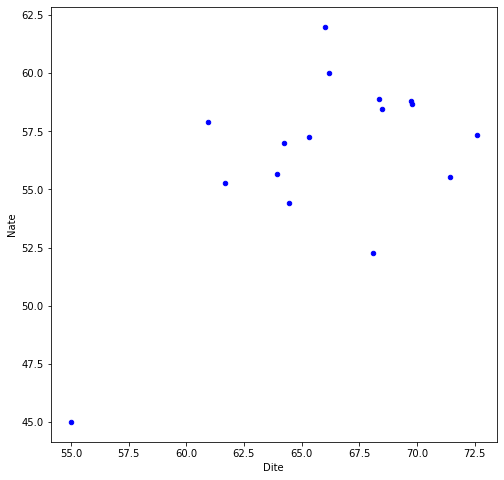

In [140]:
fig, ax = plt.subplots(figsize = (8,8))
air_2019.plot(kind='scatter',x='Dite',y='Nate',color='blue', ax = ax)

<AxesSubplot:xlabel='Dite', ylabel='Nate'>

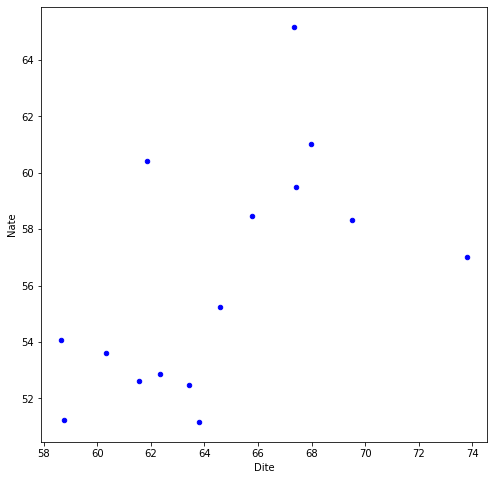

In [141]:
fig, ax = plt.subplots(figsize = (8,8))
air_2016.plot(kind='scatter',x='Dite',y='Nate',color='blue', ax = ax)

<AxesSubplot:xlabel='Dite', ylabel='Nate'>

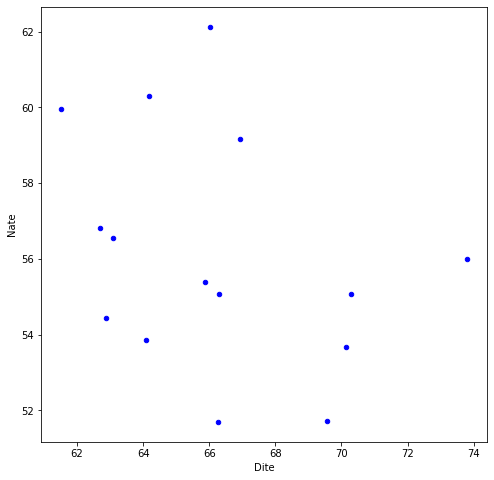

In [142]:
fig, ax = plt.subplots(figsize = (8,8))
air_2017.plot(kind='scatter',x='Dite',y='Nate',color='blue', ax = ax)

From the scatterplots, it seems that 2019 was a "louder" year than 2016 and 2017. Let's see if that's true. First, some basic average calculations:

In [146]:
import numpy as np
print(np.mean(air_2016.Dite),np.mean(air_2017.Dite),np.mean(air_2019.Dite))
print("\n")
print(np.mean(air_2016.Nate),np.mean(air_2017.Nate),np.mean(air_2019.Nate))

64.47733333333332 66.24066666666666 66.011875


56.212 56.118 56.53125


##  Next Steps: Investments: Schools  + Infrastructure Projects + Businesses